In [1]:
import sys
# Insert base project path here, like:
# sys.path.append("/home/federico/programming/CM/")
sys.path.append("/home/federico/Desktop/University/CM/")

In [2]:
import time
import random
from datetime import datetime as dt

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
plt.rcParams.update({'figure.figsize': (8, 6)})

from src.utils import *
from src.NN.metrics import mean_squared_error
from src.LS.LS import LS
from src.LS.testLS import scaling, generic_test, generate

In [3]:
random.seed(42) # Needed for reproducibility

In [4]:
def plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, mrange, n, save=False):
    
    m = mrange.stop - mrange.step
    
    # --- Plotting QR stats ---
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_qr_a3, "o-", label="mio")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    
    # --- Plotting LS stats ---
    plt.plot(mrange, time_ls_np, "^-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_ls_a3, "o-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_ls_np, "^-", label="np")
    plt.plot (mrange, time_ls_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

# Scaling test

In [5]:
starting_m = 1000
last_m = 11000
n = 100
step = 1000
repeat = 20
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=11000, t=20
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
1000   || 186.7977 | 186.7977 |   5.6143 |   5.6143 |  45.5931 |  45.5931 |   5.6080 |   5.6080
2000   || 265.0131 |  78.2155 |   6.3743 |   0.7600 |  61.7901 |  16.1970 |   8.3386 |   2.7307
3000   || 314.8649 |  49.8518 |   8.7320 |   2.3577 |  90.1231 |  28.3330 |   9.4813 |   1.1427
4000   || 380.5004 |  65.6355 |  11.7414 |   3.0094 | 126.1537 |  36.0306 |  11.5897 |   2.1084
5000   || 446.3608 |  65.8604 |  15.0359 |   3.2945 | 160.8938 |  34.7401 |  13.9119 |   2.3222
6000   || 527.2405 |  80.8797 |  19.8528 |   4.8168 | 229.4055 |  68.5117 |  17.6204 |   3.7085
7000   || 571.5859 |  44.3453 |  19.4882 |  -0.3646 | 232.0205 |   2.6150 |  17.6003 |  -0.0201
8000   || 633.2971 |  61.7112 |  22.4733 |   2.9851 | 263.9386 |  31.9181 |  19.3022 |   1.7020
9000   || 690

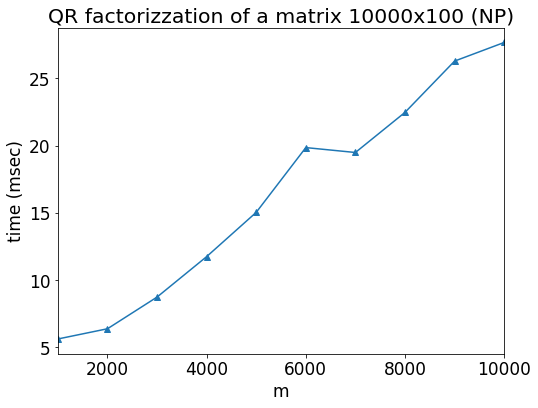

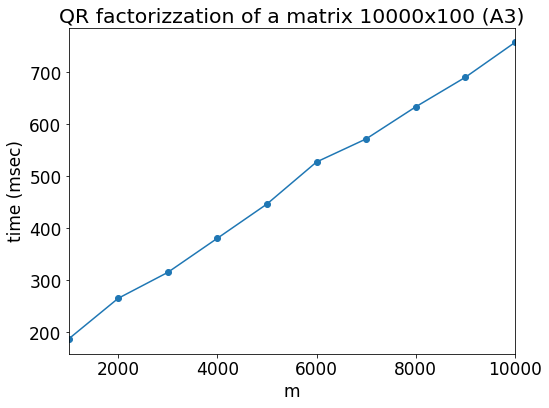

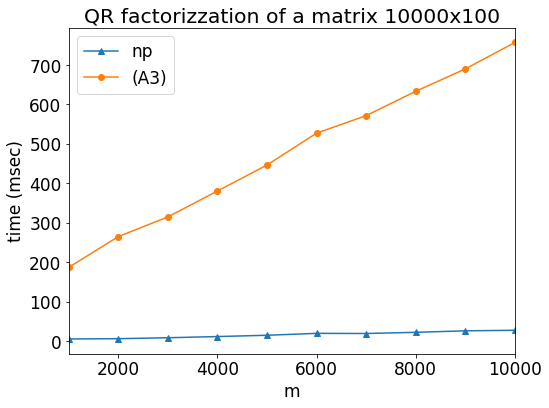

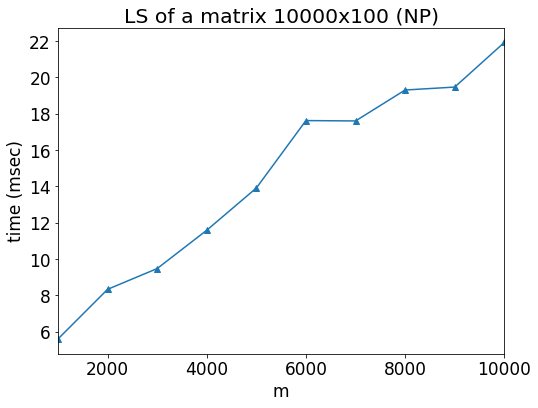

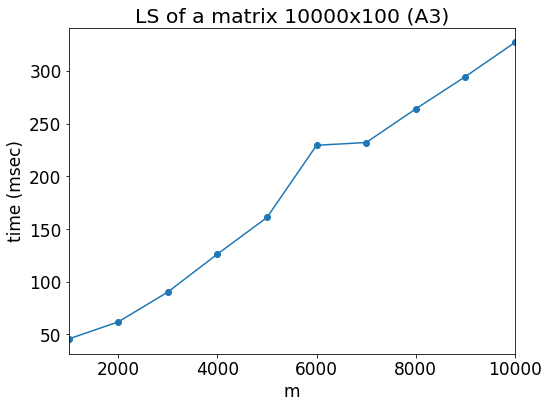

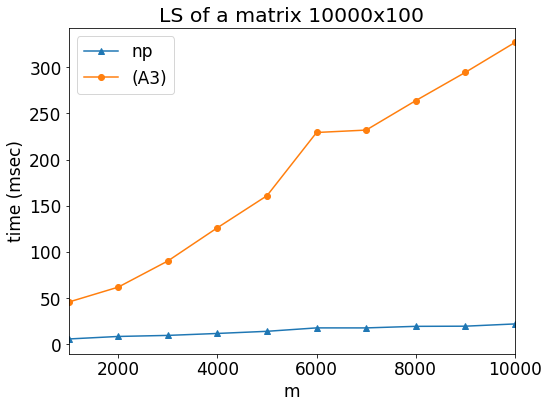

<Figure size 576x432 with 0 Axes>

In [6]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

In [7]:
starting_m = 10000
last_m = 60000
n = 100
step = 10000
repeat = 5
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=60000, t=5
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
10000  || 753.7448 | 753.7448 |  29.4026 |  29.4026 | 326.5612 | 326.5612 |  21.2638 |  21.2638
20000  || 2859.1802 | 2105.4354 | 146.9002 | 117.4976 | 765.9128 | 439.3516 |  99.1140 |  77.8502
30000  || 3648.3444 | 789.1642 | 340.6008 | 193.7006 | 1016.4898 | 250.5770 | 186.7936 |  87.6796
40000  || 5204.1562 | 1555.8118 | 526.3836 | 185.7828 | 1419.3398 | 402.8500 | 289.2332 | 102.4396
50000  || 6673.9708 | 1469.8146 | 702.4356 | 176.0520 | 1838.3690 | 419.0292 | 396.5746 | 107.3414

m        residual A3              residual np              reconstruct a3           reconstruct np          
----------------------------------------------------------------------------------------------------
10000  ||     1.0038364913226332 |     0.9946929947309094 | 1.1564180197968884e-1

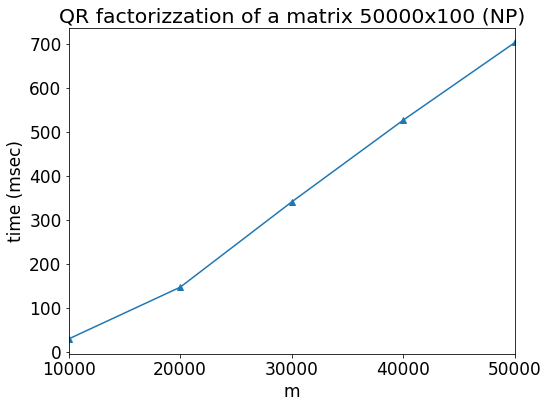

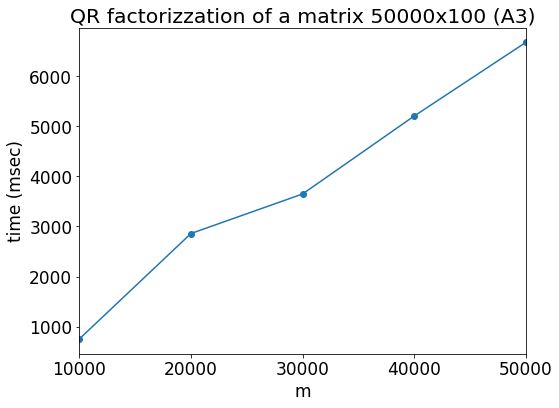

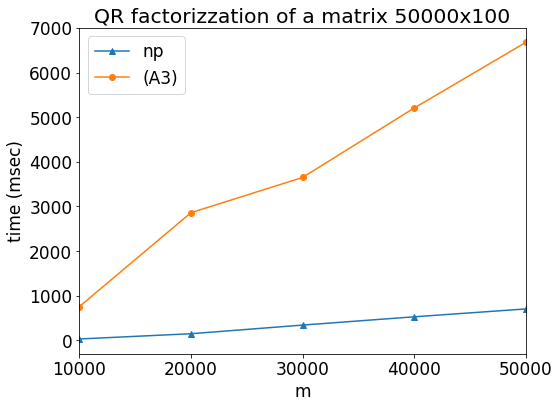

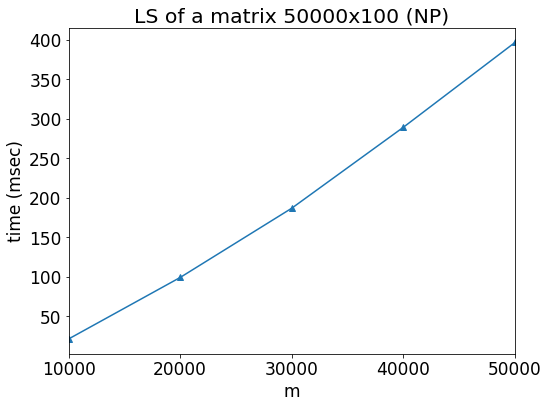

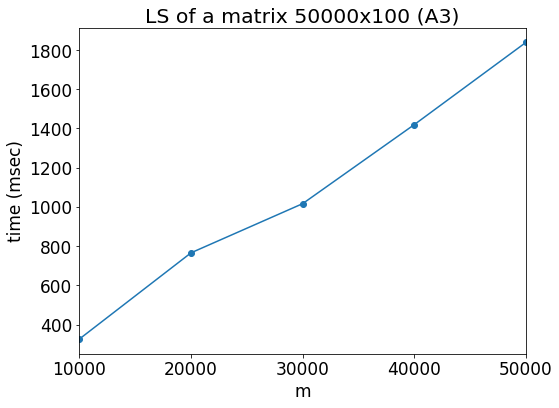

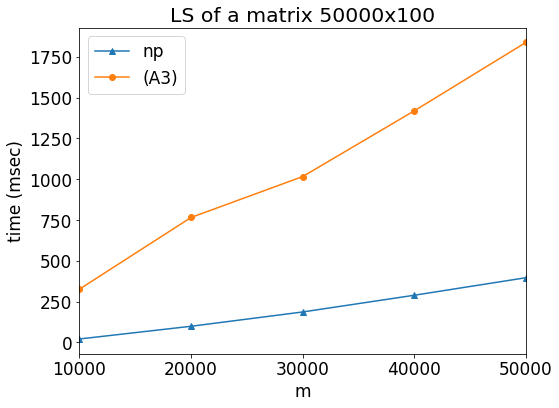

<Figure size 576x432 with 0 Axes>

In [8]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

# CUP test

In [9]:
cup = '../../data/ML-CUP20-TR.csv'

In [10]:
M, M_test, b, b_test = load_CUP(cup, split=0)
res, resnp = generic_test(M, b, 'CUP')
print(f"MSE A3: {mean_squared_error(np.matmul(M, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(M, resnp),b)}\n\n")


A,b = generate(5000,50)
res, resnp = generic_test(A, b, 'RANDOM')
print(f"MSE A3: {mean_squared_error(np.matmul(A, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(A, resnp),b)}")

---------- CUP DATASET ----------
Solved (m x n): (1524,10) in 1.864 msec, w/ np in 0.339 msec - Reverting and reconstruction: 2.529 msec, w/ np took: 0.389 msec
res error: 1.0537730959643323 - np_res error: 0.9962999753126452
relative error res: 3.9939428700662263

QR error: 4.985905640396062e-16 - QR error w/ np: 3.2893174070752376e-16

MSE A3: 972.4632084924591
MSE np: 869.279035729481


---------- RANDOM DATASET ----------
Solved (m x n): (5000,50) in 41.766 msec, w/ np in 6.58 msec - Reverting and reconstruction: 169.285 msec, w/ np took: 17.533 msec
res error: 1.0051257949606285 - np_res error: 0.994796664107203
relative error res: 1.4107440289830944

QR error: 7.736187730576775e-16 - QR error w/ np: 3.8651536202539743e-16

MSE A3: 0.4920606913668189
MSE np: 0.4819993757656366
